In [26]:
import numpy as np
import pandas as pd
df=pd.read_csv("employee_performance.csv")
df.head(3)

,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating
0,E001,Dr. Lisa Rogers,Male,Marketing,108988.18,13-11-2021,4
1,E002,Nichole Peterson,Female,Finance,31002.41,02-07-2015,5
2,E003,Paul Blair,Female,Sales,73663.33,04-05-2023,1


In [42]:
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')
df['Tenure'] = 2025 - df['JoinDate'].dt.year
df['JoinDate'] = df['JoinDate'].dt.strftime('%d-%m-%Y')
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_13420\741323271.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')


,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating,Tenure,SalaryCategory
0,E001,Dr. Lisa Rogers,Male,Marketing,108988.18,13-11-2021,4,4,High
1,E002,Nichole Peterson,Female,Finance,31002.41,02-07-2015,5,10,Low
2,E003,Paul Blair,Female,Sales,73663.33,04-05-2023,1,2,Medium
3,E004,Michelle Thomas,Other,Marketing,84044.55,18-11-2019,1,6,Medium
4,E005,Jessica Berg,Female,Marketing,92527.68,30-11-2019,3,6,High


In [40]:
# convert salary and perfomance rating to numeric
df['Salary']=pd.to_numeric(df['Salary'],errors='coerce')
df['PerformanceRating']=pd.to_numeric(df['PerformanceRating'],errors='coerce')
df.head()

,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating,Tenure,SalaryCategory
0,E001,Dr. Lisa Rogers,Male,Marketing,108988.18,13-11-2021,4,4,High
1,E002,Nichole Peterson,Female,Finance,31002.41,02-07-2015,5,10,Low
2,E003,Paul Blair,Female,Sales,73663.33,04-05-2023,1,2,Medium
3,E004,Michelle Thomas,Other,Marketing,84044.55,18-11-2019,1,6,Medium
4,E005,Jessica Berg,Female,Marketing,92527.68,30-11-2019,3,6,High


In [17]:
#finding missing values
missing_count=df.isnull().sum()
print("missing_count:")
print(missing_count)

missing_count:
EmployeeID           0
Name                 0
Gender               0
Department           0
Salary               0
JoinDate             0
PerformanceRating    0
dtype: int64


In [31]:
def categorize_salary(salary):
    if pd.isna(salary):
        return "Unknown"   
    elif salary < 50000:
        return "Low"
    elif 50000 <= salary <= 90000:
        return "Medium"
    else:
        return "High"

df['SalaryCategory'] = df['Salary'].apply(categorize_salary)
df.head()

,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating,Tenure,SalaryCategory
0,E001,Dr. Lisa Rogers,Male,Marketing,108988.18,2021-11-13,4,4,High
1,E002,Nichole Peterson,Female,Finance,31002.41,2015-07-02,5,10,Low
2,E003,Paul Blair,Female,Sales,73663.33,2023-05-04,1,2,Medium
3,E004,Michelle Thomas,Other,Marketing,84044.55,2019-11-18,1,6,Medium
4,E005,Jessica Berg,Female,Marketing,92527.68,2019-11-30,3,6,High


In [32]:
# average salary by department
avg_sal_by_dept = df.groupby('Department')['Salary'].mean()
print("Average Salary by Department:\n", avg_sal_by_dept)

Average Salary by Department:
 Department
Finance      67804.804167
HR           79740.074286
IT           77536.544286
Marketing    79803.912500
Sales        69497.878333
Name: Salary, dtype: float64


In [36]:
# gender count by department
gender_count_by_dept = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)
print("Gender Count by Department:\n", gender_count_by_dept)

Gender Count by Department:
 Gender      Female  Male  Other
Department                     
Finance          4     6      2
HR               5     1      1
IT               4     2      1
Marketing        3     5      4
Sales            7     3      2


In [37]:
# average rating by department
avg_rating_by_dept = df.groupby('Department')['PerformanceRating'].mean()
print("Average Performance Rating by Department:\n", avg_rating_by_dept)

Average Performance Rating by Department:
 Department
Finance      2.416667
HR           3.142857
IT           3.714286
Marketing    3.166667
Sales        2.916667
Name: PerformanceRating, dtype: float64


In [38]:
# low performers
low_performers = df[df['PerformanceRating'] <= 2]
print("Low Performers:\n", low_performers)

Low Performers:
    EmployeeID               Name  Gender Department     Salary   JoinDate  \
2        E003         Paul Blair  Female      Sales   73663.33 2023-05-04   
3        E004    Michelle Thomas   Other  Marketing   84044.55 2019-11-18   
12       E013        Louis Hicks    Male      Sales  118091.53 2022-12-04   
13       E014     Sheila Winters  Female      Sales   99976.18 2023-01-07   
14       E015     Richard Santos  Female         HR   94509.68 2023-04-10   
17       E018       Roger Dennis  Female         IT  115486.28 2019-04-17   
24       E025       Ashley Heath    Male    Finance   38102.06 2015-08-12   
26       E027      Matthew Davis    Male  Marketing   74667.93 2017-01-16   
27       E028      Melissa Chang    Male    Finance  118604.45 2017-02-11   
28       E029   Chelsea Shepherd  Female    Finance   46971.69 2016-03-09   
29       E030       John Carroll   Other         IT   49346.99 2022-04-20   
31       E032        David Lynch  Female      Sales   72882

#   visuavaliztions

C:\Users\hp\AppData\Local\Temp\ipykernel_13420\193506440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_by_dept, x='Department', y='Salary', palette='viridis')


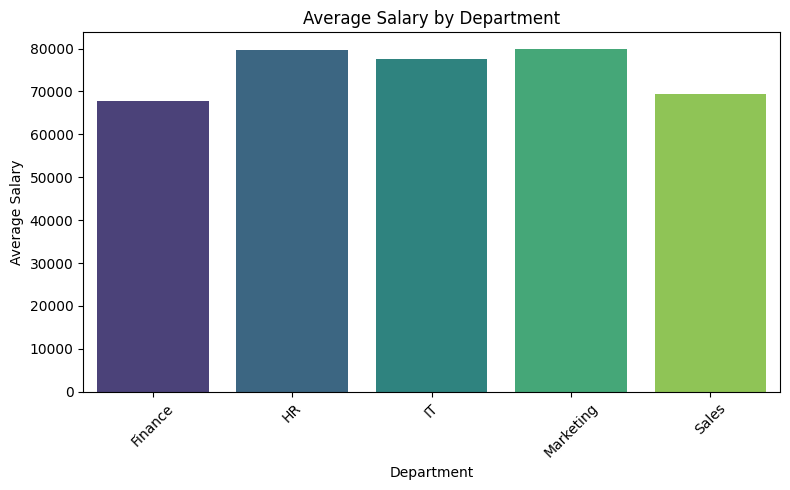

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by department
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_salary_by_dept, x='Department', y='Salary', palette='viridis')
plt.title("Average Salary by Department")
plt.ylabel("Average Salary")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

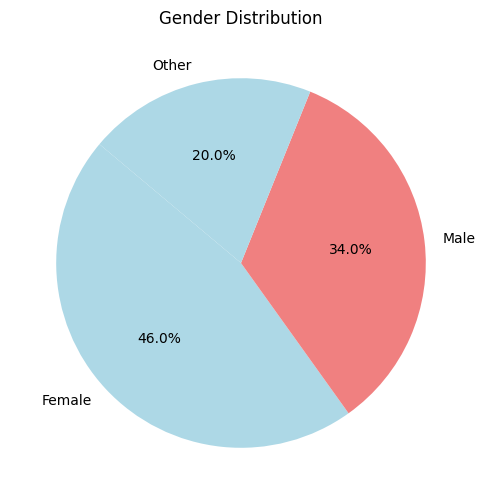

In [44]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue','lightcoral'])
plt.title("Gender Distribution")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_13420\1981149175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PerformanceRating', palette='Set2')


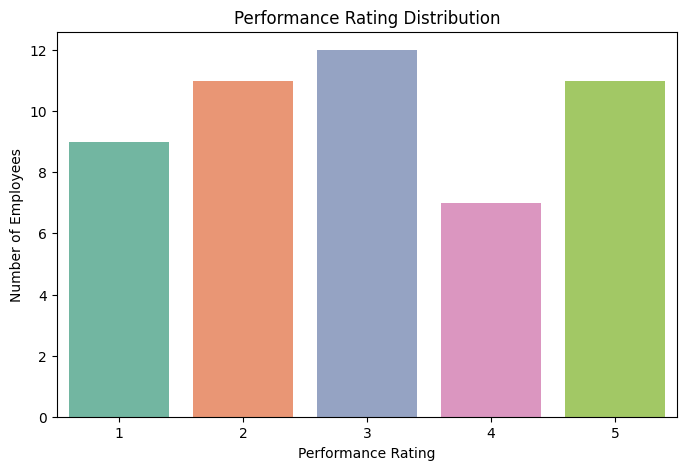

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PerformanceRating', palette='Set2')
plt.title("Performance Rating Distribution")
plt.xlabel("Performance Rating")
plt.ylabel("Number of Employees")
plt.show()


In [53]:
!pip install xlsxwriter


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
with pd.ExcelWriter("employee_analysis.xlsx", engine="xlsxwriter") as writer:
    # cleaned data
    df.to_excel(writer, sheet_name="Cleaned_Data", index=False)
    
    # summary 1: avg salary by department
    avg_sal_by_dept.reset_index().to_excel(writer, sheet_name="Avg_Salary_By_Dept", index=False)
    
    # summary 2: gender count by department
    gender_count_by_dept.reset_index().to_excel(writer, sheet_name="Gender_Count_By_Dept", index=False)
    
    # summary 3: avg rating by department
    avg_rating_by_dept.reset_index().to_excel(writer, sheet_name="Avg_Rating_By_Dept", index=False)
    
    # summary 4: low performers
    low_performers.to_excel(writer, sheet_name="Low_Performers", index=False)

print("All outputs saved to employee_analysis.xlsx successfully.")


All outputs saved to employee_analysis.xlsx successfully.
